<a href="https://colab.research.google.com/github/VishalKulkarni-Dev/McDonald-s-Nutrition-Facts/blob/main/McDonald%E2%80%99s_Nutrition_Facts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
data = pd.read_csv("/content/menu.csv")
data.head(2)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8


In [4]:
data.shape

(260, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

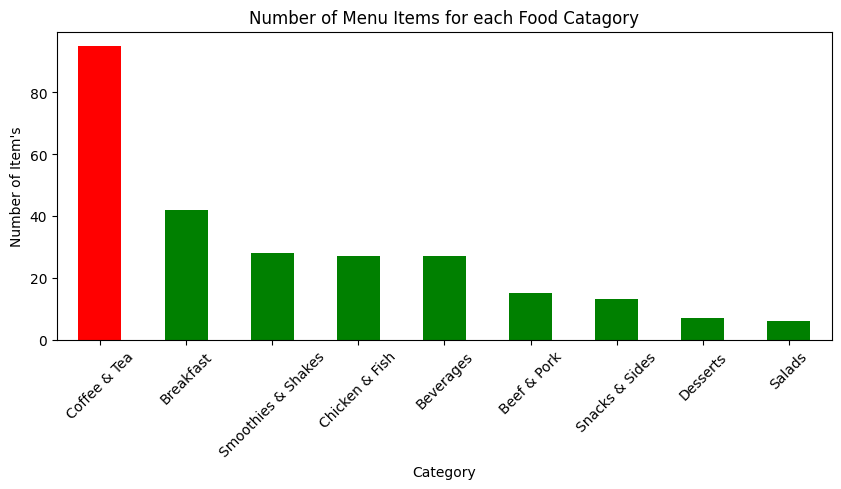

In [11]:
plt.figure(figsize=(10, 4), dpi=100)
menu_category = data.Category.value_counts()
menu_category.plot.bar(color = ['red','green','green','green','green','green','green','green','green'])
plt.title("Number of Menu Items for each Food Catagory")
plt.ylabel("Number of Item's")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

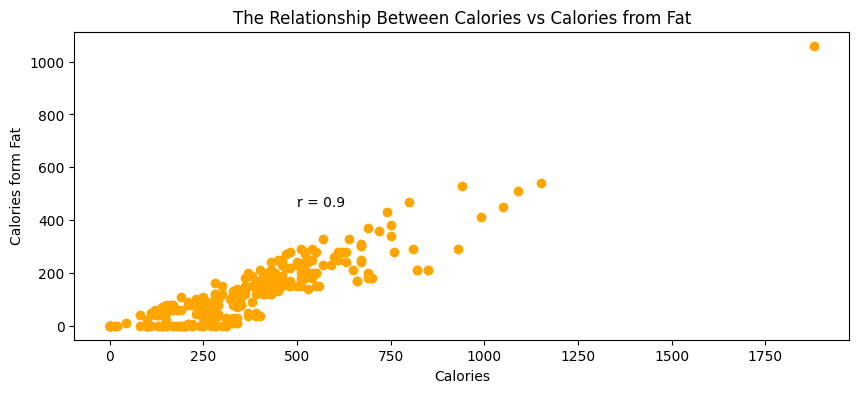

In [13]:
#Plot graph for relationship between Calories vs Calories from Fat
plt.figure(figsize=(10, 4), dpi=100) #Input plot size

correlation = data['Calories'].corr(data['Calories from Fat']) #Graph Size
plt.scatter(data.Calories, data['Calories from Fat'], color='Orange') #Get scatterplot, data, and plot color
plt.text(500,450, 'r = {}'.format(round(correlation,2)))
plt.xlabel("Calories")
plt.ylabel("Calories form Fat")
plt.title("The Relationship Between Calories vs Calories from Fat")
plt.show()

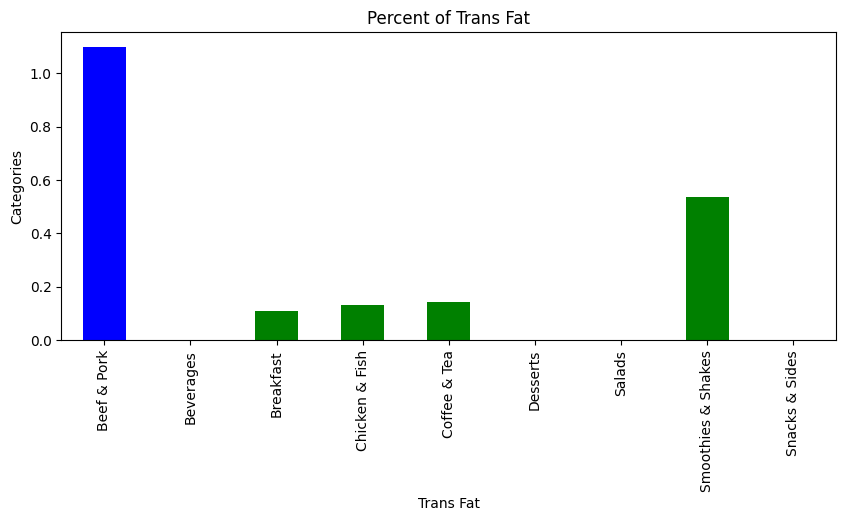

In [16]:
#Bar Graph for Percent of Trans Fat
plt.figure (figsize=(10, 4), dpi=100) #input plot size
menu_category = data.groupby('Category')['Trans Fat'].mean()
menu_category.plot.bar(color = ['blue','green','green','green','green','green','green','green','green'])
plt.title("Percent of Trans Fat")
plt.xlabel("Trans Fat")
plt.ylabel("Categories")
plt.xticks(rotation=90)
plt.show()

In [17]:
data.groupby('Category')['Trans Fat'].mean() # Trans Fat Categories

Category
Beef & Pork           1.100000
Beverages             0.000000
Breakfast             0.107143
Chicken & Fish        0.129630
Coffee & Tea          0.142105
Desserts              0.000000
Salads                0.000000
Smoothies & Shakes    0.535714
Snacks & Sides        0.000000
Name: Trans Fat, dtype: float64

In [18]:
data['saturated_cholesterol'] = data['Saturated Fat']/data['Cholesterol']*100

In [19]:
saturated_cholesterol = data.groupby('Category')['saturated_cholesterol'].mean().dropna().nlargest(5)

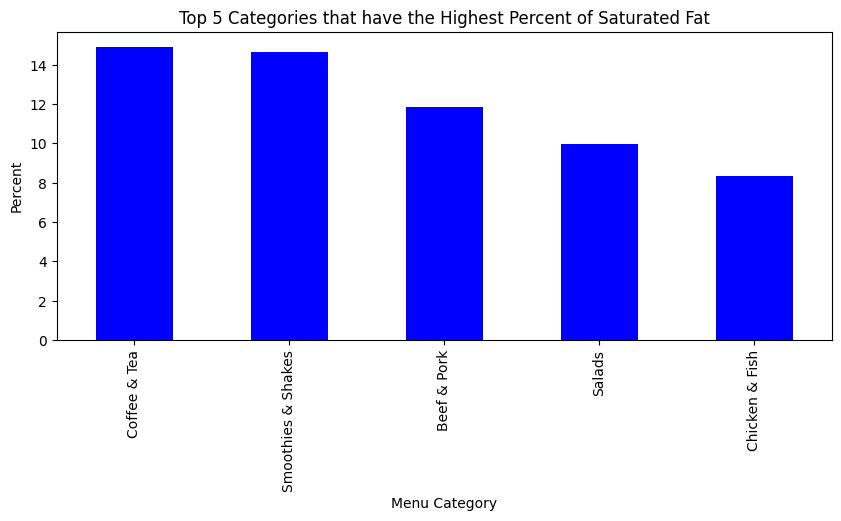

In [21]:
#Bar Graph for Percent of Saturated Fat
plt.figure(figsize=(10, 4), dpi=100)
saturated_cholesterol.sort_values(ascending=False).plot.bar(color = 'blue')
plt.title("Top 5 Categories that have the Highest Percent of Saturated Fat")
plt.ylabel("Percent")
plt.xlabel("Menu Category")
plt.xticks(rotation=90)
plt.show();

In [22]:
#Saturated Cholesterol Data
coffee_tea = data[data.Category == 'Coffee & Tea']
coffee_tea.groupby('Item')['saturated_cholesterol'].mean().sort_values(ascending=False)

Item
Frappé Chocolate Chip (Small)     21.538462
Frappé Chocolate Chip (Medium)    21.250000
Frappé Chocolate Chip (Large)     21.052632
Hazelnut Iced Coffee (Small)      20.000000
Hazelnut Latte (Medium)           20.000000
                                    ...    
Iced Tea (Small)                        NaN
Sweet Tea (Child)                       NaN
Sweet Tea (Large)                       NaN
Sweet Tea (Medium)                      NaN
Sweet Tea (Small)                       NaN
Name: saturated_cholesterol, Length: 95, dtype: float64

In [23]:
shakes = data[data.Category == 'Smoothies & Shakes']
shakes.groupby('Item')['saturated_cholesterol'].mean().sort_values()

Item
Blueberry Pomegranate Smoothie (Medium)               0.000000
Blueberry Pomegranate Smoothie (Small)                0.000000
Mango Pineapple Smoothie (Medium)                     0.000000
Mango Pineapple Smoothie (Small)                      0.000000
Strawberry Banana Smoothie (Small)                    0.000000
Strawberry Banana Smoothie (Medium)                   0.000000
Blueberry Pomegranate Smoothie (Large)               10.000000
Mango Pineapple Smoothie (Large)                     10.000000
Strawberry Banana Smoothie (Large)                   10.000000
Chocolate Shake (Medium)                             16.000000
Vanilla Shake (Medium)                               16.000000
Shamrock Shake (Medium)                              16.000000
Vanilla Shake (Large)                                16.666667
Strawberry Shake (Small)                             16.666667
Strawberry Shake (Large)                             16.666667
Shamrock Shake (Large)                            

In [24]:
beef_pork = data[data.Category == 'Beef & Pork']
beef_pork.groupby('Item')['saturated_cholesterol'].mean().sort_values()

Item
Hamburger                                    10.000000
McDouble                                     10.666667
Bacon McDouble                               11.111111
Cheeseburger                                 11.111111
Double Cheeseburger                          11.111111
Daily Double                                 11.250000
Jalapeño Double                              11.250000
Big Mac                                      11.764706
Double Quarter Pounder with Cheese           11.875000
Quarter Pounder with Bacon & Cheese          12.380952
Quarter Pounder with Bacon Habanero Ranch    12.380952
Quarter Pounder with Cheese                  12.631579
Quarter Pounder Deluxe                       12.941176
Bacon Clubhouse Burger                       13.043478
McRib                                        14.285714
Name: saturated_cholesterol, dtype: float64

In [25]:
chicken_fish = data[data.Category == 'Chicken & Fish']
chicken_fish.groupby('Item')['saturated_cholesterol'].mean().sort_values()

Item
Premium Grilled Chicken Classic Sandwich                 3.076923
Premium McWrap Chicken Sweet Chili (Grilled Chicken)     4.615385
Premium Grilled Chicken Ranch BLT Sandwich               5.000000
Southern Style Crispy Chicken Sandwich                   6.666667
Premium Grilled Chicken Club Sandwich                    6.666667
Bacon Clubhouse Grilled Chicken Sandwich                 7.272727
Premium McWrap Chicken & Bacon (Grilled Chicken)         7.368421
Chicken McNuggets (20 piece)                             7.407407
Premium McWrap Chicken & Ranch (Grilled Chicken)         7.500000
Premium McWrap Southwest Chicken (Grilled Chicken)       7.500000
Chicken McNuggets (6 piece)                              7.500000
Chicken McNuggets (40 piece)                             7.547170
Chicken McNuggets (10 piece)                             7.692308
Premium Crispy Chicken Classic Sandwich                  7.777778
Chicken McNuggets (4 piece)                              8.000000
McChi

In [26]:
data.groupby('Category')['Vitamin A (% Daily Value)'].mean()

Category
Beef & Pork             6.933333
Beverages               0.740741
Breakfast               6.928571
Chicken & Fish         20.444444
Coffee & Tea           10.736842
Desserts                5.142857
Salads                146.666667
Smoothies & Shakes     18.750000
Snacks & Sides          4.846154
Name: Vitamin A (% Daily Value), dtype: float64

In [27]:
data.groupby('Category')['Vitamin C (% Daily Value)'].mean()

Category
Beef & Pork            7.333333
Beverages             23.481481
Breakfast              8.904762
Chicken & Fish        12.629630
Coffee & Tea           0.000000
Desserts               4.142857
Salads                28.333333
Smoothies & Shakes     6.964286
Snacks & Sides        28.153846
Name: Vitamin C (% Daily Value), dtype: float64

In [28]:
beverage = data[data.Category == 'Beverages']
beverage.groupby('Item')['Vitamin C (% Daily Value)'].mean().sort_values()

Item
Diet Dr Pepper (Small)                 0.0
Sprite (Large)                         0.0
Sprite (Child)                         0.0
Fat Free Chocolate Milk Jug            0.0
Dr Pepper (Small)                      0.0
Dr Pepper (Medium)                     0.0
Dr Pepper (Large)                      0.0
Dr Pepper (Child)                      0.0
Sprite (Medium)                        0.0
Diet Dr Pepper (Medium)                0.0
Diet Dr Pepper (Large)                 0.0
Sprite (Small)                         0.0
Diet Coke (Small)                      0.0
Diet Coke (Medium)                     0.0
Diet Coke (Large)                      0.0
Diet Coke (Child)                      0.0
Dasani Water Bottle                    0.0
Coca-Cola Classic (Small)              0.0
Coca-Cola Classic (Medium)             0.0
Coca-Cola Classic (Large)              0.0
Coca-Cola Classic (Child)              0.0
Diet Dr Pepper (Child)                 0.0
1% Low Fat Milk Jug                    4.0
Minute

In [29]:
iron = data.groupby('Category')['Iron (% Daily Value)'].mean()
calcium = data.groupby('Category')['Calcium (% Daily Value)'].mean()

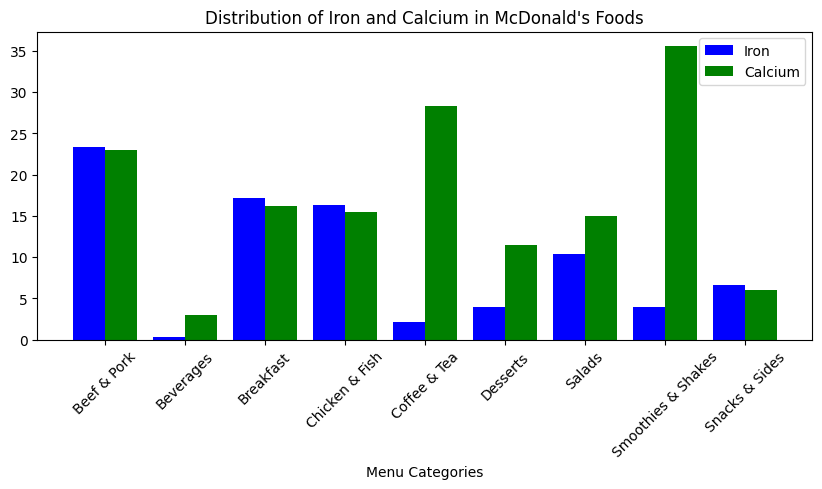

In [30]:
plt.figure(figsize=(10, 4), dpi=100)

category = iron.index
Iron = iron.values
Calcium = calcium.values

X_axis = np.arange(len(category))

plt.bar(X_axis - 0.2, Iron, 0.4, label = 'Iron', color = 'blue')
plt.bar(X_axis + 0.2, Calcium, 0.4, label = 'Calcium', color = 'green')

plt.xticks(X_axis, category)
plt.xlabel("Menu Categories")
plt.title("Distribution of Iron and Calcium in McDonald's Foods")
plt.xticks(rotation=45)
plt.legend()
plt.show()